#  Load Train & Test data using Pandas 

In [1]:
#Bussiness problem is to predict how many people survived, using training and testing dataset.

import pandas as pd
import numpy as np

train = pd.read_csv('C:/Users/addiction computers/Desktop/Python_Titanic_Project/train.csv')
test = pd.read_csv('C:/Users/addiction computers/Desktop/Python_Titanic_Project/test.csv')

# Exploratory Data Analysis 

In [2]:
train.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# DATA DICCTIONARY

# Survival : 0 = No, 1 = Yes
# pclass   : 1 = 1st, 2 = 2nd, 3 = 3rd (Ticket Class) 
# sibsp    : Number of siblings / spouses aboard the Titanic.
# parch    : Number of parents / children aboard the Titanic.
# embarked : C = Cherbourg, Q = Queenstown, S = Southampton.

In [5]:
train.shape

(891, 12)

In [6]:
test.shape    # Survive feature is a dependent feature in train data set.

(418, 11)

In [7]:
train.info() #Mising values in feature's of train data set are Age, Cabin and 2 from Embarked.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.info() # Mising value in feature's of test dataset are Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#Remove unnecessary column
train.drop(['PassengerId'], axis=1, inplace=True)

In [12]:
import seaborn as sns 

sns.countplot(x='Survived',data= train)  # (More than 500 not survived & more than 300 survived)

In [13]:
# Hence feature's like cabin, Passenger_Id, Ticket, Name not relevent to the survived independent feature.


In [14]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead =train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

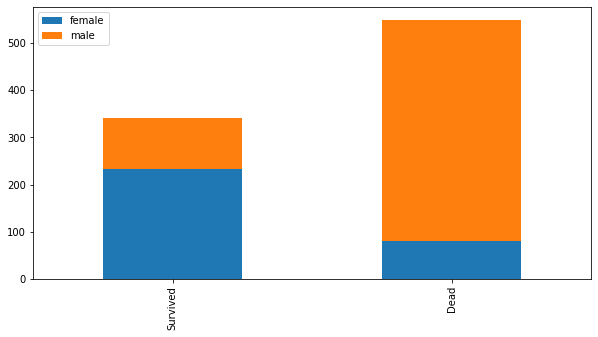

In [15]:
bar_chart('Sex')

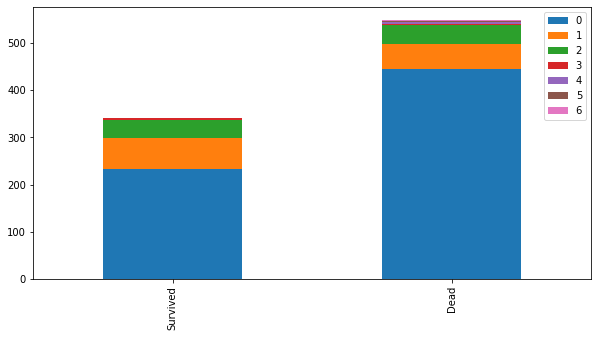

In [16]:
bar_chart('Parch')

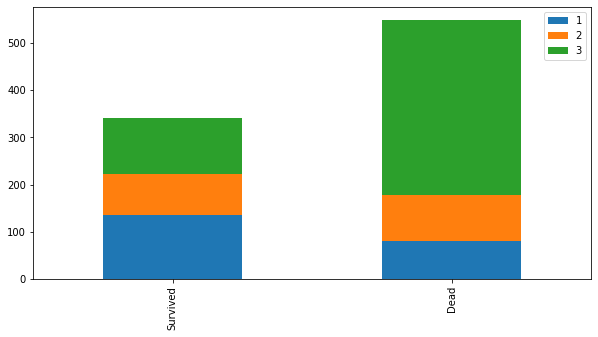

In [17]:
bar_chart('Pclass')

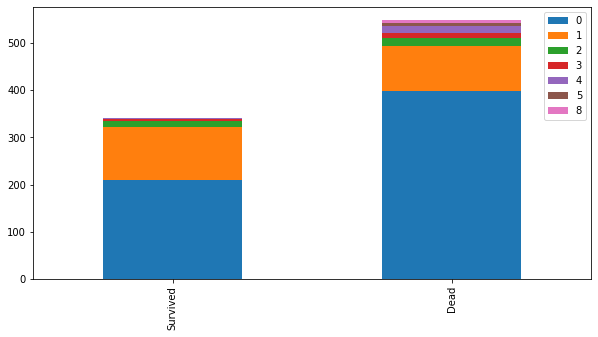

In [18]:
bar_chart('SibSp')

# Feature Engineering

In [19]:
train_test_data=[train,test] # Combining Train and test data

In [20]:
#Handling SEX Feature

sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

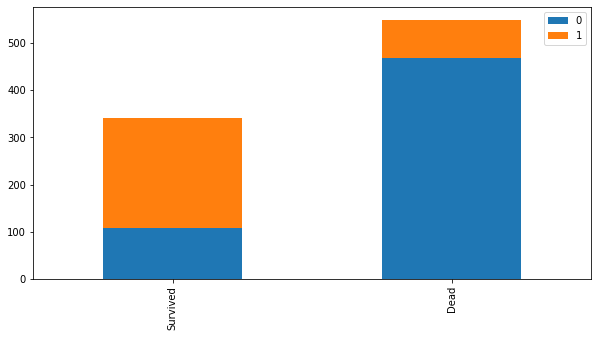

In [21]:
bar_chart('Sex')

In [22]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


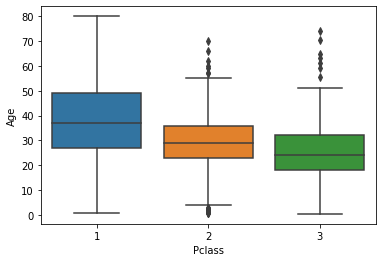

In [23]:
# Handling Missing value in AGE Feature

sns.boxplot(x='Pclass', y='Age', data=train)

In [24]:
def age_approx_train(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else:
        return Age
    

In [25]:
train['Age'] = train[['Age' , 'Pclass']].apply(age_approx_train, axis=1)
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

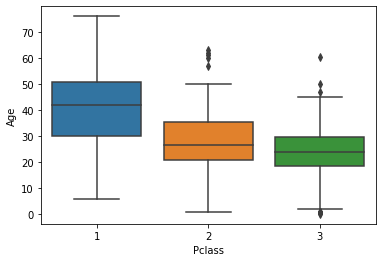

In [26]:
sns.boxplot(x='Pclass', y='Age', data=test)

In [27]:
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 28
        else: 
            return 24
    else:
        return Age
   

In [28]:
test['Age'] = test[['Age' , 'Pclass']].apply(age_approx, axis=1)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
train_test_data=[train,test] # Combining Train and test data

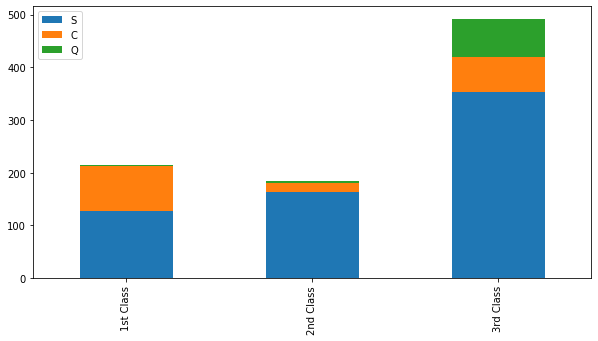

In [30]:
# Embarked:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [31]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [32]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [33]:
Embarked_mapping={"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(Embarked_mapping)

In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


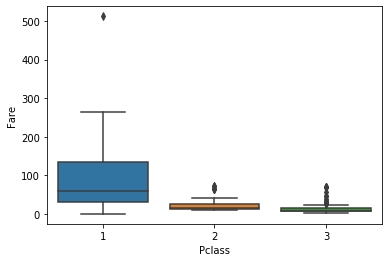

In [35]:
# Handling 1 Missing Value of Fare Feature in test dataset.

sns.boxplot(x='Pclass', y='Fare', data=test)

In [36]:
for dataset in train_test_data:
    dataset['Fare']=dataset['Fare'].fillna('52')

In [37]:
# Handling Cabin Missing Value
feature_drop = ['Name','Cabin', 'Ticket']
train=train.drop(feature_drop, axis=1)
test=test.drop(feature_drop, axis=1)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null object
Embarked       418 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 26.2+ KB


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# Modelling

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [41]:
#Divide data into input and target values

X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]


In [42]:
#Method - Logistic Regreesion

logisticRegression = LogisticRegression()
scores = cross_val_score(logisticRegression, X_train, y_train, cv=5)
accuracy = scores.mean()
print("Logistic Regreesion Accuracy :", accuracy)

Logistic Regreesion Accuracy : 0.8024898689156309


C:\Users\addiction computers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\addiction computers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\addiction computers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\addiction computers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\addiction computers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [43]:
#Create test data
X_test = test.drop("PassengerId", axis=1)

In [44]:
#Run Lostistic Regression for better results
logisticRegression.fit(X_train, y_train)

C:\Users\addiction computers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_test = logisticRegression.predict(X_test)

In [48]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_test
    })
submission.to_csv('submission.csv', index=False)